# Visualisation graphique : Seaborn

## Un 1er jeu de données

In [5]:
import pandas as pd
data = pd.read_csv('Data/Demographic-Data.csv')
data.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


## Introduction à Seaborn

*Seaborn* est un package très puissant construit à partir de matplotlib et qui permet de visualiser les informations de différentes manières.

Pour voir les différentes visualisations possibles, regrader la page https://seaborn.pydata.org/examples/index.html ou chercher *galerie Seaborn* sur internet

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogrammes = distribution

/home/elka/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


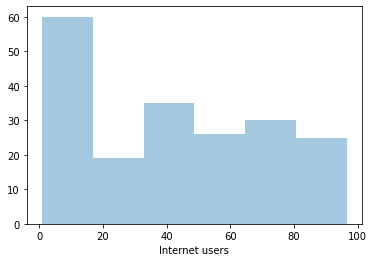

In [7]:
vis1 = sns.distplot(data['Internet users'], kde=False)

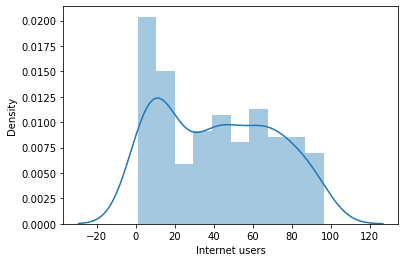

In [8]:
vis1 = sns.distplot(data['Internet users'], bins=10)

## Boxplots

In [ ]:
vis2 = sns.boxplot(data=data, x='Income Group', y='Birth rate')

## Stripplot

In [ ]:
# équivalent du scatter plot pour des variables catégories
vis3 = sns.stripplot(x='Income Group', y='Internet users', data = data)

## Combinaison de graphes dans une figure

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
fig.subplots_adjust(wspace = 0.3)

ax1 = sns.histplot(data['Internet users'], bins=10, ax = axes[0])
ax1.set_title('Histogramme')

ax2 = sns.boxplot(data=data, x='Income Group', y='Birth rate', ax = axes[1])
ax2.set_title('Boîte')

plt.xticks(rotation=70)
plt.show()

## Modèles linéaires

In [ ]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate')

In [ ]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate',fit_reg=False)

In [ ]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate', fit_reg = False, hue='Income Group')

In [ ]:
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate', fit_reg = False, hue='Income Group', height = 8)

In [ ]:
# on peut ajouter des options d'affichage de matplotlib, il faut utiliser les dictionnaires {scatter,lines}_kws
# (kws = key words arguments)
vis3 = sns.lmplot(data=data, x='Internet users', y='Birth rate',
                  fit_reg = False,
                  hue='Income Group',
                  height = 10,
                  scatter_kws ={'s':100})

---
---

## Nouveau jeu de données

In [ ]:
movies = pd.read_csv('Data/Movie-Ratings.csv')
movies.head()

In [ ]:
# on peut changer le nom de colonnes par des noms plus faciles à utiliser
# (moins longs, sans espaces ni caractère spéciaux)
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings', 'Budget', 'Year']
movies.head()

In [ ]:
movies.info()

In [ ]:
movies.describe()

### Type de données Category

In [ ]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [ ]:
movies.info()

In [ ]:
movies.Genre.cat.categories

In [ ]:
movies.Year.cat.categories

In [ ]:
movies.Genre.describe()

In [ ]:
movies.describe()

---
---

## JointPlots

In [ ]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings')

In [ ]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings', kind = 'hex')

In [ ]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings', kind = 'reg')

In [ ]:
vis4 = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings', kind = 'kde')

## Histogrammes empilés

Les histogrammes empilés (*stacked histograms*) consistent à empiler chaque colonne l'une sur l'autre.

In [ ]:
# on peut superposer des histogrammes, mais ce n'est pas exactement ce qu'on veut...
plt.hist(movies[movies.Genre=='Action'].Budget, bins=12)
plt.hist(movies[movies.Genre=='Drama'].Budget, bins=12)
plt.hist(movies[movies.Genre=='Thriller'].Budget, bins=12)
plt.show()

In [ ]:
# on peut mettre côte à côte sur un même graphique des histogrammes, mais ce n'est toujours pas ce qu'on veut...
plt.hist([movies[movies.Genre=='Action'].Budget,
          movies[movies.Genre=='Drama'].Budget,
          movies[movies.Genre=='Thriller'].Budget],
         bins=12)
plt.show()

In [ ]:
movies
movies[['Film','Genre']]
movies.Film

In [ ]:
# une solution : l'option stacked
plt.hist([movies[movies.Genre=='Action'].Budget,
          movies[movies.Genre=='Drama'].Budget,
          movies[movies.Genre=='Thriller'].Budget],
         bins=15,
        stacked = True)
plt.show()

### Petit exercice  

Construire un histogramme empilé avec tous les genres présents dans le jeu de données.

In [ ]:
l=list()
labels=list()

for genre in movies.Genre.cat.categories:
    l.append(movies[movies.Genre==genre].Budget)
    labels.append(genre)

plt.hist(l, stacked = True, bins=15, label=labels)
plt.legend()
plt.show()

## Kernel Density Estimates (KDE) plot

In [ ]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings)

In [ ]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, shade = True)

In [ ]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Reds')

In [ ]:
vis5 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   cmap='Reds')
vis5b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Reds')

## Diagrammes en violon

In [ ]:
vis6 = sns.violinplot(data=movies, x='Genre', y='CriticRatings')

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
fig.subplots_adjust(wspace = 0.3)
ax1 = sns.violinplot(data=movies, x='Genre', y='CriticRatings', ax = axes[0])
ax2 = sns.boxplot(data=movies, x='Genre', y='CriticRatings', ax = axes[1])
plt.show()

### Exercice

- Filtrer les données uniquement pour le genre Drame
- Afficher une figure avec les 2 graphiques (violon et boîte à moustaches) pour les notes des critiques en fonction des années
- Comparer les deux types de graphiques pour voir leur intérêt

## Facet Grid

In [ ]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = {'s':50, 'linewidth':0.5, 'edgecolor':'black'}
#kws = dict(s=50, linewidth=0.5, edgecolor='black')          
g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)

In [ ]:
# on peut généraliser à tous les types de graphiques
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(bins=12)
g = g.map(plt.hist, 'CriticRatings', **kws)

In [ ]:
# on peut ajouter les diagonales par exemple et fixer les échelles des axes
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

kws = {'s':50, 'linewidth':0.5, 'edgecolor':'black'} #kws = dict(s=50, linewidth=0.5, edgecolor=black')

g = g.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)

g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c='gray', ls='--')
    
g.add_legend()

## Une belle figure : un dashboard (tableau de bord)

In [ ]:
sns.set_style('white') #pour changer le fond, essayer avec 'darkgrid' par exemple pour voir la différence

f,axes = plt.subplots(2,2,figsize =(15,15))

# Axes 1
k1 = sns.kdeplot(movies.Budget, movies.AudienceRatings, ax = axes[0,0])

# Axes 2
k2 = sns.kdeplot(movies.Budget, movies.CriticRatings, ax = axes[0,1])

# Axes 3
v = sns.violinplot(data = movies, x ='Year', y='CriticRatings', ax = axes[1,0])

# Axes 4
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='Reds', ax= axes[1,1])
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Reds', ax= axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

In [ ]:
sns.set_style('darkgrid', {'axes.facecolor' : 'black'})

f,axes = plt.subplots(2,2,figsize =(15,15))

# Axes 1
k1 = sns.kdeplot(movies.Budget, movies.AudienceRatings, cmap='cool', ax = axes[0,0])
k1b = sns.kdeplot(movies.Budget, movies.AudienceRatings, 
                 shade = True, shade_lowest=False, cmap='inferno', ax = axes[0,0])

# Axes 2
k2 = sns.kdeplot(movies.Budget, movies.CriticRatings, cmap='Blues', ax = axes[0,1])
k2b = sns.kdeplot(movies.Budget, movies.CriticRatings, 
                 shade = True, shade_lowest=False, cmap='Greens', ax = axes[0,1])

# Axes 3
v = sns.violinplot(data = movies, x ='Year', y='CriticRatings', ax = axes[1,0],
                  palette = 'YlOrRd')

# Axes 4
k3 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, cmap='gist_gray_r', ax= axes[1,1])
k3b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                   shade = True, shade_lowest=False, cmap='Blues', ax= axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

### Exercice

Créer votre propre dashboard avec 6 graphiques différents à partir des tous les exemples vus dans ce notebook.